From notebook: https://github.com/cta-observatory/dl1-data-handler/blob/main/notebooks/test_image_mapper.ipynb

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from ctapipe.instrument import SubarrayDescription
from ctapipe.instrument.camera import CameraGeometry
from dl1_data_handler.image_mapper import ImageMapper

In [6]:
SIMTEL_DATA_PATH='../data/samples/gamma/'
SIMTEL_FILE='gamma_200_800E3GeV_20_20deg_ATM52_100505.corsika.gz.NSBmed4.simtel.gz'

In [7]:
hexagonal_cameras = ['DigiCam']
mapper_class_names = ["AxialMapper", "ShiftingMapper", "BilinearMapper", "BicubicMapper", "RebinMapper", "NearestNeighborMapper", "OversamplingMapper"]
subarray = SubarrayDescription.read(os.path.join(SIMTEL_DATA_PATH, SIMTEL_FILE))

/home/hugo/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctapipe/instrument/camera/geometry.py:616: FromNameWarning: .from_name uses pre-defined data that is likely different from the data being analyzed. Access instrument information via the SubarrayDescription instead.
  warn_from_name()


DigiCam - AxialMapper:
Initialization time: 
24.8 ms ± 467 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Mapping time: 
23 μs ± 203 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


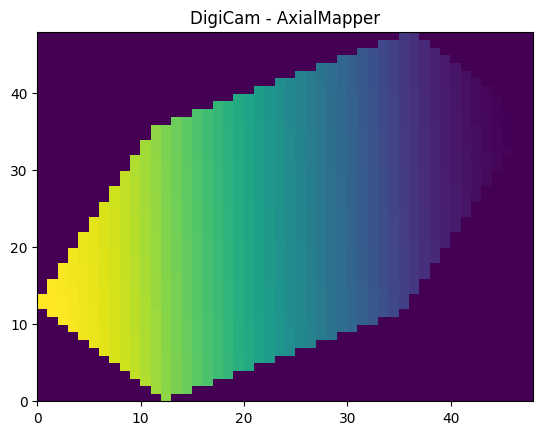

DigiCam - ShiftingMapper:
Initialization time: 
23.7 ms ± 753 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Mapping time: 
23.1 μs ± 360 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


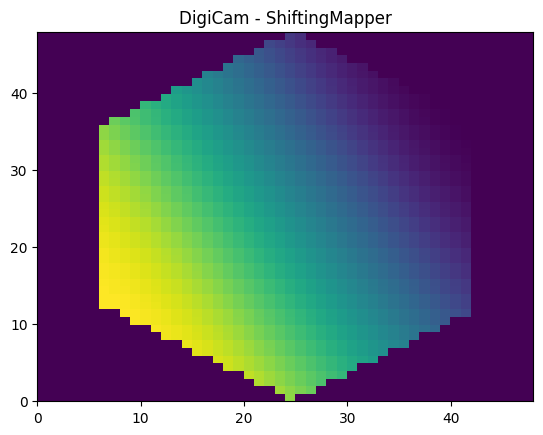

DigiCam - BilinearMapper:
Initialization time: 
149 ms ± 1.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Mapping time: 
34.9 μs ± 492 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


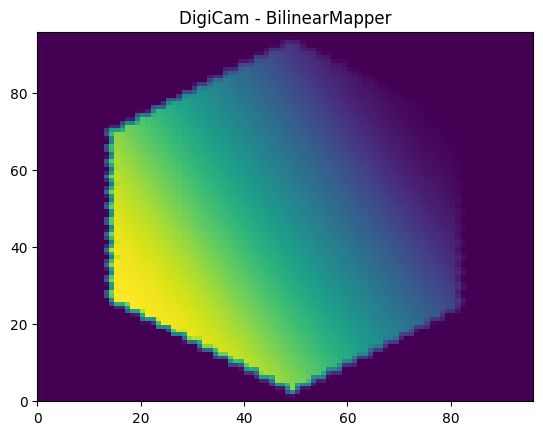

DigiCam - BicubicMapper:
Initialization time: 
970 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Mapping time: 
68.4 μs ± 570 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


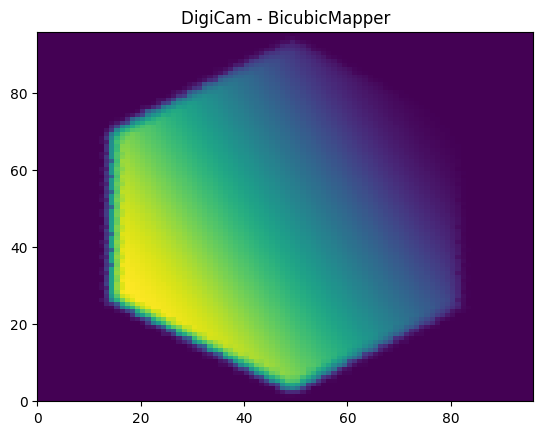

DigiCam - RebinMapper:


MemoryError: Unable to allocate 40.3 GiB for an array with shape (1040400, 102, 102) and data type float32

In [8]:
for mapper_class_name in mapper_class_names:
    for camera in hexagonal_cameras:
        cam_geom = CameraGeometry.from_name(camera)
        print(f"{camera} - {mapper_class_name}:")
        image_mapper = ImageMapper.from_name(mapper_class_name, geometry=cam_geom, subarray=subarray)
        print("Initialization time: ")
        %timeit image_mapper = ImageMapper.from_name(mapper_class_name, geometry=cam_geom, subarray=subarray)
        test_pixel_values = np.expand_dims(np.arange(image_mapper.n_pixels), axis=1)
        image = image_mapper.map_image(test_pixel_values)
        print("Mapping time: ")
        %timeit image = image_mapper.map_image(test_pixel_values)

        fig, ax = plt.subplots(1)
        ax.pcolor(image[:,:,0], cmap='viridis')
        ax.set_title(f"{camera} - {mapper_class_name}")
        plt.show()